This project aims to use Monte Carlo simulation to forecast stock returns and predict volatility. Monte Carlo methods involve running a large number of simulations to model the probability of different outcomes in financial markets. By simulating a stock's price over time, you can estimate future returns and the volatility of those returns. Additionally, an Artificial Neural Network (ANN) model will be used to compare the returns on investments and volatility predictions obtained from the Monte Carlo Simulation. Statistical inferences such as Pearson correlation coefficient, t-test, and p-value analysis will be included to validate the models and improve the accuracy of predictions.

In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import yfinance as yf # type: ignore
import matplotlib.pyplot as plt # type: ignore



We will be preparing the data of top 5 companies (by Market Capitalization) from the data available through Yahoo finance which includes Nvidia, Sirius XM Holdings Inc., Apple Inc., Bank of America Corporation & Cisco Systemt. Inc., from 1st January 2010 to 1st January 2023. 

In [5]:
# Define the list of stocks
tickers = ['NVDA', 'SIRI', 'AAPL', 'BAC', 'CSCO']
data = yf.download(tickers=tickers, start='2010-01-01', end='2023-01-01')['Adj Close']


[*********************100%***********************]  5 of 5 completed


We will be creating a monte carlo simulation for input features like log of returns and further using GBM to estimate future prices to obtain returns on stocks, thereby involving the usage of Black scholes model for constant volatility, and that the distribution of stock price is logarithmically - normally distributed.

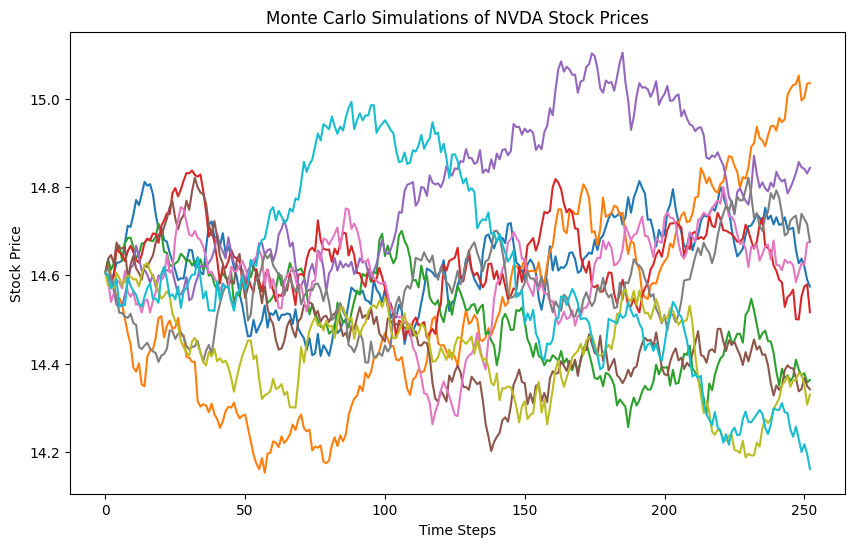

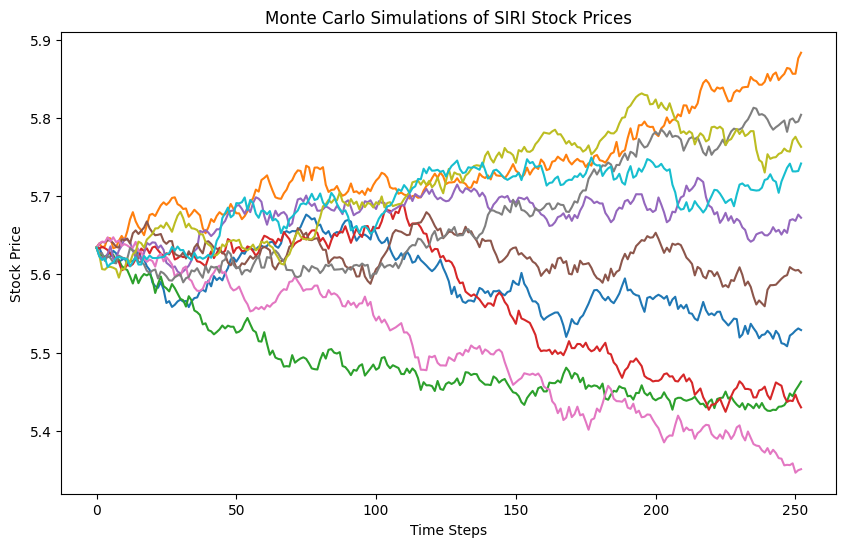

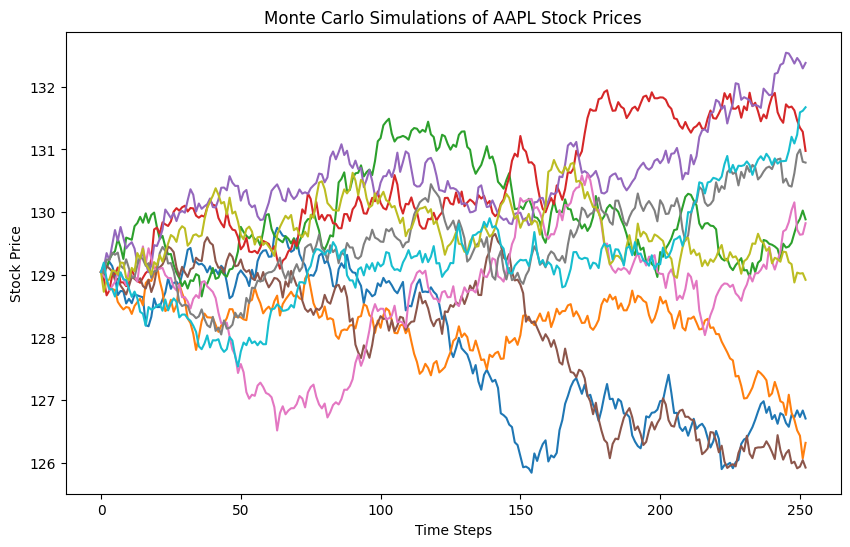

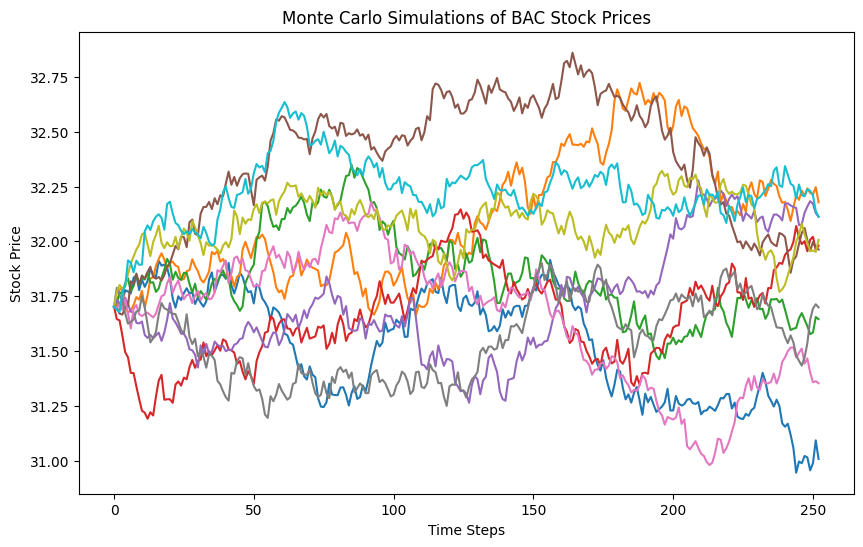

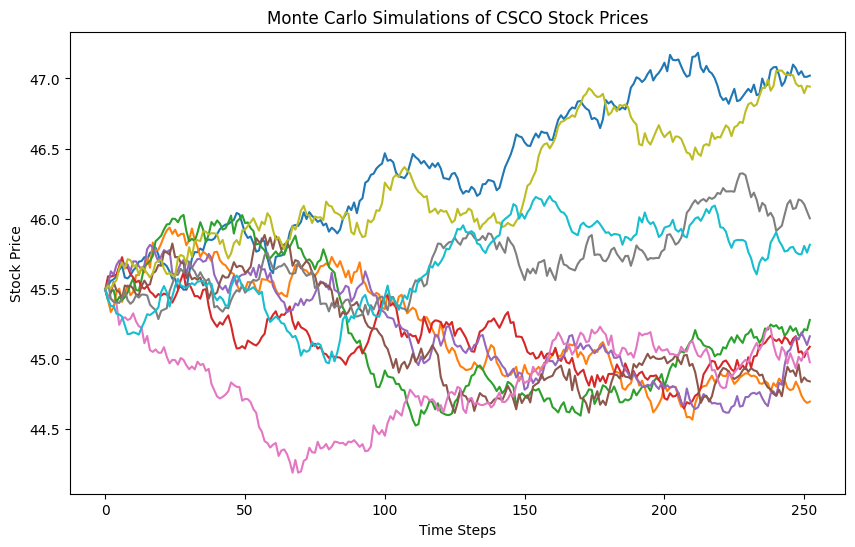

In [6]:
log_returns = np.log(data / data.shift(1)).dropna()

# Monte Carlo Simulation function
def monte_carlo_simulation(S0, mu, sigma, T, M, I):
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        Z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return S

# Plotting the results of Monte Carlo Simulation for each stock
for ticker in tickers:
    S0 = data[ticker][-1]
    mu = log_returns[ticker].mean()
    sigma = log_returns[ticker].std()
    T = 1.0
    M = 252
    I = 10000
    
    simulations = monte_carlo_simulation(S0, mu, sigma, T, M, I)
    
    plt.figure(figsize=(10, 6))
    plt.plot(simulations[:, :10])
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulations of {ticker} Stock Prices')
    plt.show()
